Lista 2




In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ethon0426/lending-club-20072020q1")

print("Path to dataset files:", path)

KaggleApiHTTPError: 401 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/ethon0426/lending-club-20072020q1
Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

import os, sys


data_directory = '~/Downloads/archive/data.gzip'
os.path.isfile(data_directory)

False

In [2]:
data = pd.read_csv(data_directory, low_memory=False, index_col=0)

data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [42]:
display(data.info)

<bound method DataFrame.info of                id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0         1077501     5000.0       5000.0           4975.0   36 months   
1         1077430     2500.0       2500.0           2500.0   60 months   
2         1077175     2400.0       2400.0           2400.0   36 months   
3         1076863    10000.0      10000.0          10000.0   36 months   
4         1075358     3000.0       3000.0           3000.0   60 months   
...           ...        ...          ...              ...         ...   
105446  102556443    24000.0      24000.0          24000.0   60 months   
105447  102653304    10000.0      10000.0          10000.0   36 months   
105448  102628603    10050.0      10050.0          10050.0   36 months   
105449  102196576     6000.0       6000.0           6000.0   36 months   
105450   99799684    30000.0      30000.0          30000.0   60 months   

       int_rate  installment grade sub_grade                 emp_title  ...  \


In [43]:
data['loan_status']


0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4          Fully Paid
             ...     
105446    Charged Off
105447     Fully Paid
105448    Charged Off
105449     Fully Paid
105450    Charged Off
Name: loan_status, Length: 2925493, dtype: object

In [3]:
data['loan_status'].drop_duplicates()

0                                               Fully Paid
1                                              Charged Off
39786                                                  NaN
39787    Does not meet the credit policy. Status:Fully ...
39788    Does not meet the credit policy. Status:Charge...
1                                                  Current
4                                       Late (31-120 days)
204                                        In Grace Period
4936                                     Late (16-30 days)
9231                                               Default
3                                                   Issued
Name: loan_status, dtype: object

In [4]:
# For transforming the problem into a binary classification we will encode the target so that it contains only 1, 0, and nan.

mapping = {
    "Fully Paid" : 0,
    "Current" : np.nan,
    "Charged Off" : 1,
    "Late (31-120 days)" : np.nan,
    "In Grace Period" : np.nan,
    "Late (16-30 days)" : np.nan,
    "Issued" : np.nan,
    "Does not meet the credit policy. Status:Fully Paid" : np.nan,
    "Does not meet the credit policy. Status:Charged Off" : np.nan,
    "Default" : 1
}


def encoding_target(x):
    if isinstance(x,str):
        return mapping[x]
    return np.nan


# Performing the encoding
# data['loan_status'] = data['loan_status'].map(encoding_target)

# Droping all irrelevant data
# data.dropna(subset=['loan_status'],inplace=True)

In [5]:
data['target'] = data['loan_status'].map(mapping)
data['target'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [27]:
# data['target'] = [mapping[str(x)] for x in data['load_Status']]
# data['target']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
105446   NaN
105447   NaN
105448   NaN
105449   NaN
105450   NaN
Name: target, Length: 2925493, dtype: float64

In [6]:
for column in data.columns:
	print(f"{column}: {data[column].dtype}")

id: object
loan_amnt: float64
funded_amnt: float64
funded_amnt_inv: float64
term: object
int_rate: object
installment: float64
grade: object
sub_grade: object
emp_title: object
emp_length: object
home_ownership: object
annual_inc: float64
verification_status: object
issue_d: object
loan_status: object
pymnt_plan: object
url: object
purpose: object
title: object
zip_code: object
addr_state: object
dti: float64
delinq_2yrs: float64
earliest_cr_line: object
fico_range_low: float64
fico_range_high: float64
inq_last_6mths: float64
mths_since_last_delinq: float64
mths_since_last_record: float64
open_acc: float64
pub_rec: float64
revol_bal: float64
revol_util: object
total_acc: float64
initial_list_status: object
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: float64
collection_recovery_fee: float64
last_pymnt_d: object
last_pymnt_amnt: float64
next_pymnt_d: object


In [ ]:
for col in data.columns:
	if data[col].dtype == object:
		if data[col].nunique() > 100:
			print(f"{col} has {data[col].nunique()} unique values -- ommited")
			continue
		data[col].value_counts().plot(kind='bar')
	else:
		data.plot(kind='bar')

plt.title()
plt.show()

In [12]:
data['hardship_start_date'].drop_duplicates()

0               NaT
2712     2017-05-01
3136     2017-06-01
3239     2017-09-01
6937     2017-10-01
9279     2017-12-01
15796    2017-08-01
22131    2017-07-01
35152    2018-01-01
38533    2018-03-01
39301    2018-02-01
1        2020-04-01
4        2020-02-01
369      2020-05-01
376      2018-11-01
751      2018-08-01
786      2019-05-01
867      2019-01-01
939      2019-07-01
946      2018-07-01
1277     2018-09-01
1781     2019-03-01
1794     2019-11-01
1955     2019-10-01
2113     2019-12-01
2252     2020-01-01
2441     2018-12-01
2447     2018-06-01
2604     2018-10-01
2673     2019-04-01
5634     2019-02-01
5747     2019-06-01
9288     2019-08-01
9480     2020-03-01
11491    2019-09-01
44420    2017-11-01
60909    2018-05-01
61723    2018-04-01
37869    2017-02-01
225193   2017-03-01
155      2020-07-01
504      2020-10-01
2264     2020-08-01
3854     2020-06-01
5667     2020-09-01
248282   2017-04-01
66158    2017-01-01
Name: hardship_start_date, dtype: datetime64[ns]

In [50]:
timestamp_mapping = {
	"Jan": "01",
	"Feb": "02",
	"Mar": "03",
	"Apr": "04",
	"May": "05",
	"Jun": "06",
	"Jul": "07",
	"Aug": "08",
	"Sep": "09",
	"Oct": "10",
	"Nov": "11",
	"Dec": "12"
}

In [10]:
# data['hardship_start_date'] = pd.Timestamp(int(data['hardship_start_date'][3:]), int(data['hardship_start_date'][0:3].map(timestamp_mapping)))
data['hardship_start_date'] = pd.to_datetime(data['hardship_start_date'], format="%b-%Y")
data['hardship_start_date']
# pd.Timestamp

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
105446   NaT
105447   NaT
105448   NaT
105449   NaT
105450   NaT
Name: hardship_start_date, Length: 2925493, dtype: datetime64[ns]

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

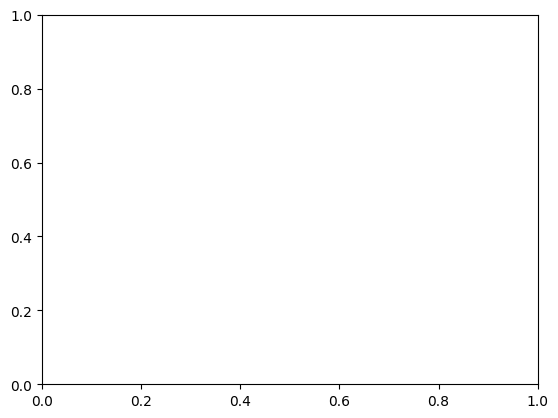

In [15]:
# data['hardship_start_date'].plot(kind='bar')